# Evaluation important embedding features in the Boston Housing dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler

from ivis_explanations import LinearExplainer
from ivis import Ivis

Using TensorFlow backend.


In [2]:
data = load_boston()

X = data['data']
feature_names = data['feature_names']
X = MinMaxScaler().fit_transform(X)
X.shape

(506, 13)

In [3]:
ivis = Ivis(k=15, model='maaten')
ivis.fit(X)

100%|██████████| 506/506 [00:00<00:00, 128953.57it/s]

Building KNN index
Extracting KNN from index



100%|██████████| 506/506 [00:00<00:00, 3814.49it/s]

Instructions for updating:
Colocations handled automatically by placer.


Training neural network
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/1000
3/3 [==============================] - 1s 302ms/step - loss: 1.2882
Epoch 2/1000
3/3 [==============================] - 0s 58ms/step - loss: 0.8617
Epoch 3/1000
3/3 [==============================] - 0s 61ms/step - loss: 0.9132
Epoch 4/1000
3/3 [==============================] - 0s 61ms/step - loss: 0.8630
Epoch 5/1000
3/3 [==============================] - 0s 61ms/step - loss: 1.0764
Epoch 6/1000
3/3 [==============================] - 0s 60ms/step - loss: 0.9233
Epoch 7/1000
3/3 [==============================] - 0s 60ms/step - loss: 0.8654
Epoch 8/1000
3/3 [==============================] - 0s 61ms/step - loss: 0.8067
Epoch 9/1000
3/3 [==============================] - 0s 60ms/step - loss: 0.7498
Epoch 10/1000
3/3 [==============================] - 0s 59ms/step - loss: 1.0286
Epoch 11/1000
3/3 [=============================

3/3 [==============================] - 0s 58ms/step - loss: 0.2101
Epoch 96/1000
3/3 [==============================] - 0s 56ms/step - loss: 0.2585
Epoch 97/1000
3/3 [==============================] - 0s 56ms/step - loss: 0.2236
Epoch 98/1000
3/3 [==============================] - 0s 57ms/step - loss: 0.1882
Epoch 99/1000
3/3 [==============================] - 0s 60ms/step - loss: 0.1942
Epoch 100/1000
3/3 [==============================] - 0s 89ms/step - loss: 0.2100
Epoch 101/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.1999
Epoch 102/1000
3/3 [==============================] - 0s 56ms/step - loss: 0.2542
Epoch 103/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.2140
Epoch 104/1000
3/3 [==============================] - 0s 56ms/step - loss: 0.2335
Epoch 105/1000
3/3 [==============================] - 0s 56ms/step - loss: 0.1825
Epoch 106/1000
3/3 [==============================] - 0s 56ms/step - loss: 0.1851
Epoch 107/1000
3/3 [===============

Ivis(annoy_index_path='annoy.index', batch_size=128, distance='pn',
     embedding_dims=2, epochs=1000, k=15, margin=1, model=None,
     n_epochs_without_progress=50, ntrees=50, precompute=True, search_k=-1,
     verbose=1)

In [4]:
explainer = LinearExplainer(ivis)
embeddings = ivis.transform(X)
feature_importances = explainer.feature_importances_(X)
feature_importances

506/506 [==============================] - 0s 88us/step


array([0.35129827, 0.43465893, 0.69007914, 0.3770067 , 0.73393634,
       0.17872578, 0.71778656, 0.71243085, 0.73215468, 0.7429525 ,
       0.54488707, 0.38180567, 0.46200096])

Text(0.5, 1.0, 'Feature: 5')

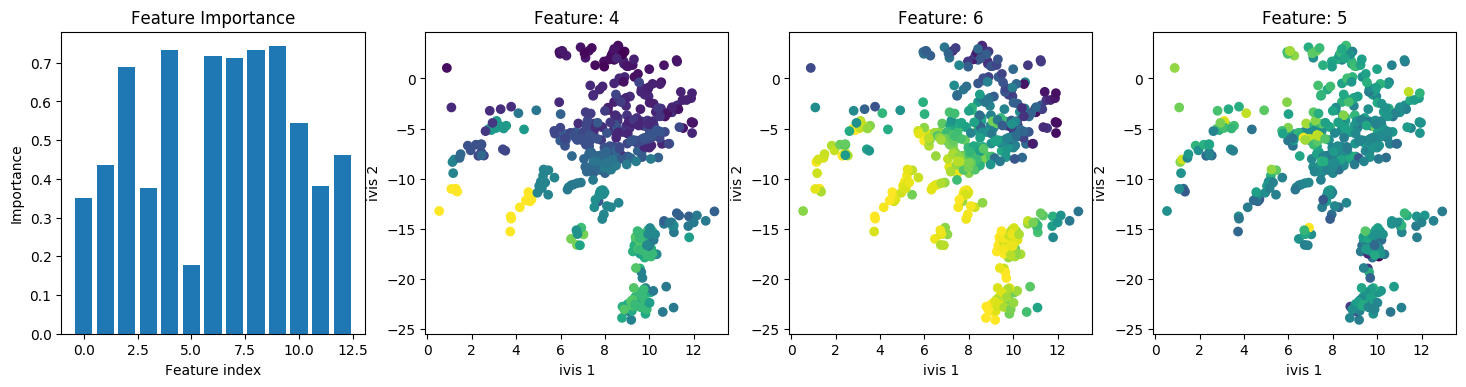

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(18, 4), dpi=100)

ax = axs[0]
ax.bar(x=np.arange(len(feature_importances)),
        height=feature_importances)
ax.set_xlabel('Feature index')
ax.set_ylabel('Importance')
ax.set_title('Feature Importance')

ax = axs[1]
ax.scatter(x=embeddings[:, 0], y=embeddings[:, 1], c=X[:, 4])
ax.set_xlabel('ivis 1')
ax.set_ylabel('ivis 2')
ax.set_title('Feature: 4')

ax = axs[2]
ax.scatter(x=embeddings[:, 0], y=embeddings[:, 1], c=X[:, 6])
ax.set_xlabel('ivis 1')
ax.set_ylabel('ivis 2')
ax.set_title('Feature: 6')

ax = axs[3]
ax.scatter(x=embeddings[:, 0], y=embeddings[:, 1], c=X[:, 5])
ax.set_xlabel('ivis 1')
ax.set_ylabel('ivis 2')
ax.set_title('Feature: 5')

In [6]:
print('Most important feature (#4): ' + str(feature_names[4]))
print('Leas important feature (#5): ' + str(feature_names[5]))

Most important feature (#4): NOX
Leas important feature (#5): RM
